In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import json
import requests

from CP_trend import *

from pandas.io.json import json_normalize
%load_ext autoreload
%autoreload 2
%load_ext autotime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.27 ms


In [2]:
termDict_2 = {
"Open Shoulder" : ["open shoulder", "off the shoulder", "off shoulder", "cold shoulder"],
"Satin/Silk" : ["satin", "silk"],
"Animal Print": ["animal print", "leopard", "cheetah", "tiger", "snakeskin", "zebra"],
"Prairie": ["prairie", "milkmaid", "puff sleeve", "puff shoulder", "smocked, smocking"],
"Utility": ["utility", "cargo", "boiler suit"]
}

In [3]:
search_data = pkl.load(open("./data/search_data_2019-09.pkl", "rb"))

In [4]:
keyterms = list(search_data.index)

In [5]:
keyterms.sort()

In [7]:
util_terms=[]
for key in keyterms:
    for term in termDict_2["Utility"]:
        if term in key: 
            util_terms.append(key)


In [8]:
util_terms

['black cargo pants',
 'black utility jacket',
 'blue boiler suit',
 'boiler suit',
 'boys cargo pants',
 'boys cargo shorts',
 'cargo belt',
 'cargo cosmetics',
 'cargo jacket',
 'cargo jeans',
 'cargo pants',
 'cargo pockets',
 'cargo shirt',
 'cargo shirts',
 'cargo shorts',
 'cargo skirt',
 'cargo swim trunks',
 'cargo trousers',
 'denim boiler suit',
 'dockers cargo shorts',
 'green boiler suit',
 'green utility jacket',
 'khaki cargo pants',
 'mens cargo pants',
 'mens cargo shorts',
 'mens utility pants',
 'plus size cargo pants',
 'red boiler suit',
 'skinny cargo pants',
 'utility belt',
 'utility dress',
 'utility jacket',
 'utility jumpsuit',
 'utility overalls',
 'utility pants',
 'utility pockets',
 'utility romper',
 'utility shirt',
 'utility shorts',
 'utility skirt',
 'utility suit',
 'utility trousers',
 'utility vest',
 'utility work pants',
 'wide leg cargo pants',
 'womens cargo pants',
 'womens cargo shorts']

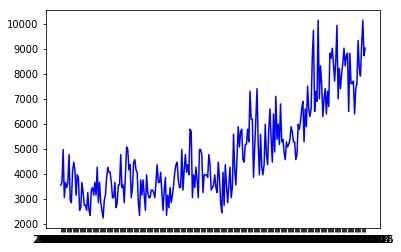

In [15]:
for term in util_terms[:1]:
    plt.plot(list(search_data.columns), search_data.loc[term], color = 'b')
    #black cargo pants    

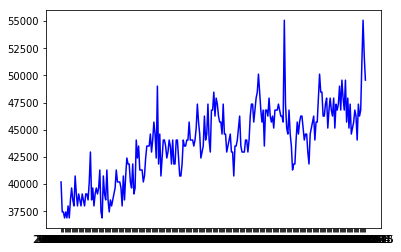

In [16]:
plt.plot(list(search_data.columns), search_data.loc["satin"], color = 'b')

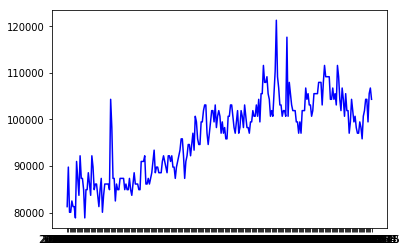

In [17]:
plt.plot(list(search_data.columns), search_data.loc["silk"], color = 'b')

calculating t0 for silk


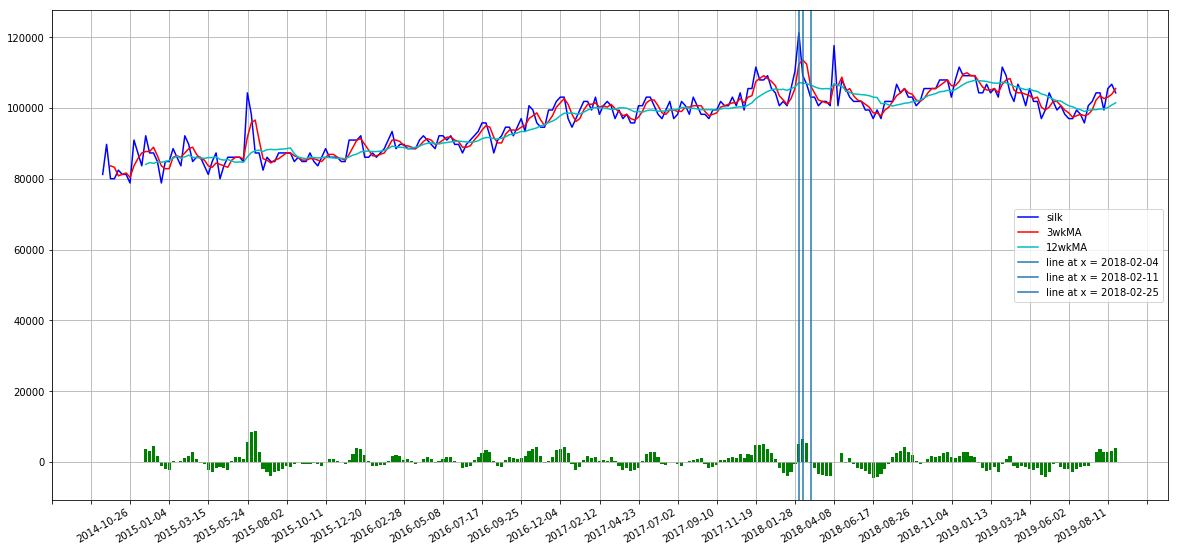

'2018-02-04'

time: 1.5 s


In [20]:
plot_t0('silk', search_data)

calculating t0 for satin


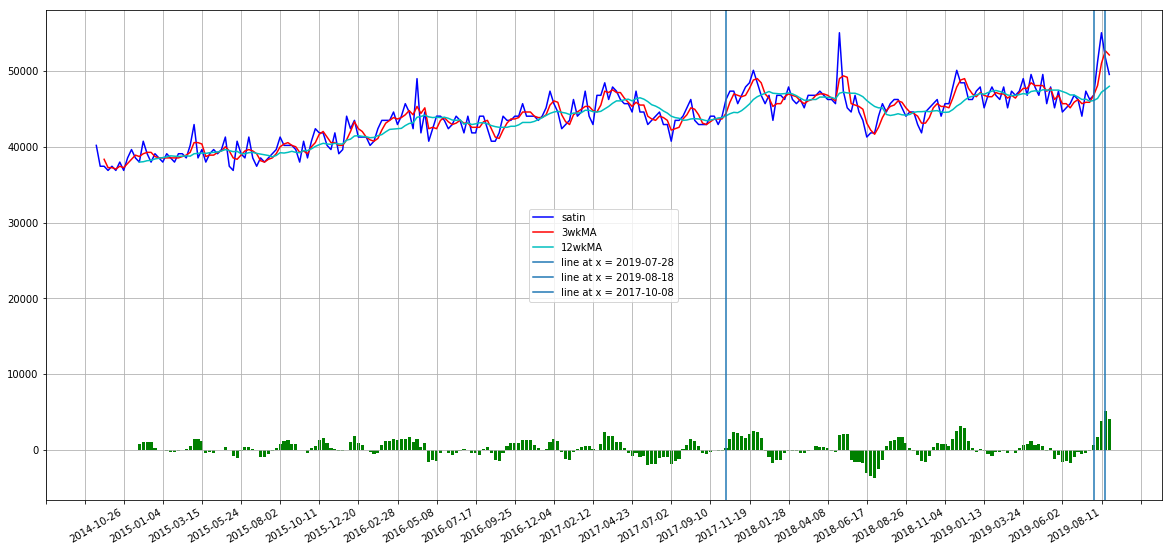

'2019-07-28'

time: 1.45 s


In [21]:
plot_t0('satin', search_data)

calculating t0 for black cargo pants


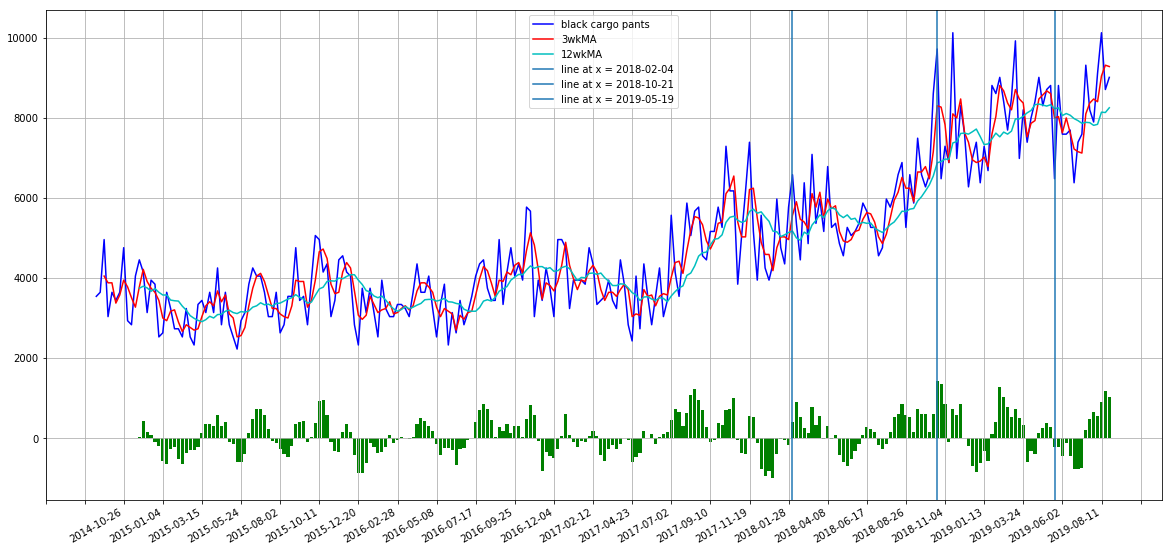

'2018-02-04'

time: 1.4 s


In [22]:
plot_t0('black cargo pants', search_data) #let's use cargo

In [ ]:
#let's pull api data for all terms under Utility and 

In [23]:
ret_df = pd.read_csv('Retailer_ID.csv', encoding = "ISO-8859-1")
ret_df = ret_df.drop(range(104,len(ret_df)))

time: 11.9 ms


In [24]:
ret_df.head(3)

,Market Index,Retail Site,Retailer ID,Crawled?
0,Contemporary Index,Alice + Olivia,864,Crawler
1,Contemporary Index,Isabel Marant,400331576-isabelmarant,Crawler
2,Contemporary Index,A.L.C.,45771179-alc,Crawler


time: 13.4 ms


In [33]:
termDict_3 = {
"Open Shoulder" : ["open shoulder", "off the shoulder", "off shoulder", "cold shoulder"],
"Animal Print": ["animal print", "leopard", "cheetah", "tiger", "snakeskin", "zebra"],
"Prairie": ["prairie", "milkmaid", "puff sleeve", "puff shoulder", "smocked", "smocking"],
"Utility": ["utility", "cargo", "boiler suit"]
}

time: 1.82 ms


In [34]:
'%20'.join('open shoulder'.split(" "))

'open%20shoulder'

time: 2.22 ms


In [35]:
trends = []
trend_tops = []
for key, values in termDict_3.items():
    for term in values:
        t1w = '%20'.join(term.split(" "))
        trend_tops.append(key)
        trends.append(t1w)

time: 1.55 ms


In [36]:
trend_tops

['Open Shoulder',
 'Open Shoulder',
 'Open Shoulder',
 'Open Shoulder',
 'Animal Print',
 'Animal Print',
 'Animal Print',
 'Animal Print',
 'Animal Print',
 'Animal Print',
 'Prairie',
 'Prairie',
 'Prairie',
 'Prairie',
 'Prairie',
 'Prairie',
 'Utility',
 'Utility',
 'Utility']

time: 2.65 ms


In [37]:
trends

['open%20shoulder',
 'off%20the%20shoulder',
 'off%20shoulder',
 'cold%20shoulder',
 'animal%20print',
 'leopard',
 'cheetah',
 'tiger',
 'snakeskin',
 'zebra',
 'prairie',
 'milkmaid',
 'puff%20sleeve',
 'puff%20shoulder',
 'smocked',
 'smocking',
 'utility',
 'cargo',
 'boiler%20suit']

time: 2.27 ms


In [80]:
ret_df["Retailer ID"].dropna().unique()

array(['864', '400331576-isabelmarant', '45771179-alc', '2412', '801',
       '760', '152651556-acnestudios', '804731108-iro', '1909',
       '750312749-thekooples', '359318405-lagence', '105', '21', '1691',
       '500269677-aritzia', '8', '25', '306', '1', '23',
       '756639511-seedheritage', '574', '930080541-massimodutti',
       '398219112-torrid', '2001', '2294', '1690', '58533412-zara', '108',
       '36', '1745', '483', '408', '1689', '970193273-rue21', '29',
       '1841', '491303298-next', '2351', '2531', '27', '895', '1375',
       '1402', '6', '7', '994', '769926722-hermes', '10', '9', '2601',
       '344', '625324324-louisvuitton', '924989490-prada',
       '562481900-saintlaurent', '312443187-valentino', '2493',
       '157913149-tomford', '900125254-chloe', '777583743-dolcegabbana',
       '220138893-dior', '1787', '494', '1340', '716752426-walmart',
       '928', '413', '2', '133', '150', '3', '11', '986-belk',
       '842544654-childrensplace', '171870510-carters', '

time: 3.71 ms


In [104]:
week_cols = ['2/25/18', '3/4/18', '3/11/18', '3/18/18', '3/25/18', '4/1/18',
       '4/8/18', '4/15/18', '4/22/18', '4/29/18', '5/6/18', '5/13/18',
       '5/20/18', '5/27/18', '6/3/18', '6/10/18', '6/17/18', '6/24/18',
       '7/1/18', '7/8/18', '7/15/18', '7/22/18', '7/29/18', '8/5/18',
       '8/12/18', '8/19/18', '8/26/18', '9/2/18', '9/9/18', '9/16/18',
       '9/23/18', '9/30/18', '10/7/18', '10/14/18', '10/21/18', '10/28/18',
       '11/4/18', '11/11/18', '11/18/18', '11/25/18', '12/2/18', '12/9/18',
       '12/16/18', '12/23/18', '12/30/18', '1/6/19', '1/13/19', '1/20/19',
       '1/27/19', '2/3/19', '2/10/19', '2/17/19', '2/24/19', '3/3/19',
       '3/10/19', '3/17/19', '3/24/19', '3/31/19', '4/7/19', '4/14/19',
       '4/21/19', '4/28/19', '5/5/19', '5/12/19', '5/19/19', '5/26/19',
       '6/2/19', '6/9/19', '6/16/19', '6/23/19', '6/30/19', '7/7/19',
       '7/14/19', '7/21/19', '7/28/19', '8/4/19', '8/11/19', '8/18/19',
       '8/25/19', '9/1/19', '9/8/19', '9/15/19', '9/22/19', '9/29/19',
       '10/6/19', '10/13/19', '10/20/19']

time: 13.5 ms


In [108]:
def expand_agg_price_wk(skuhist_list, trend_top, trend, retailer):
    '''
    @description: this function expands the dataframe from the API call to include the columns for the   months and the
                prices of each of the products during that month
    @params:
    - skuhis_list: the output of the API call and key 'products'
    - trend: trend to search, i.e. "high waisted jeans"
    - retailer: the retailer name
    - metric: count, median, min, max
    @return: returns the expanded dataframe, single row
    '''
    count_df= pd.DataFrame()
    count_df.at[0,"trend_top"] = trend_top
    count_df.at[0,"trend"] = trend
    count_df.at[0,"ret_id"] = retailer #only 1
    med_df= pd.DataFrame()
    med_df.at[0,"trend_top"] = trend_top
    med_df.at[0,"trend"] = trend
    med_df.at[0,"ret_id"] = retailer #only 1
    '''
    for c in week_cols:
        count_df[c] = np.nan
        med_df[c] = np.nan
    '''    
    for b in skuhist_list:
        #if not b['price'][0] == {}:
        if not b['count'] == 0:    
            date = b['from'][:10]
            count = b['count']
            #med = b['price'][0]['usd']['median']
            med = b['price']['usd']['median']
            count_df.at[0,date] = count
            med_df.at[0,date] = med
    
    return count_df, med_df

time: 4.28 ms


In [105]:
#Dillards 11, leopard

api_endpt = 'https://market-api-3.trendalytics.co/v1/products/histogram?filters=sku&cat=womens-clothes'\
            '&fts=leopard&fl=r11&'\
            'regions=us&pricetype=current&sku_by=week&month_span=20'
response = requests.get(api_endpt)
try:
            output = json.loads(response.content.decode('utf-8'))
except:
            print("Response status code is: ",response.status_code)

time: 3.14 s


In [110]:
#count_j, med_j = expand_agg_price_wk(output['skuHistogram'], "animal print", 'leopard', '11', week_cols)

time: 320 ms


In [112]:
#count_j.columns

Index(['trend_top', 'trend', 'ret_id', '2/25/18', '3/4/18', '3/11/18',
       '3/18/18', '3/25/18', '4/1/18', '4/8/18',
       ...
       '2019-09-15', '2019-09-22', '2019-09-29', '2019-10-06', '2019-10-13',
       '2019-10-20', '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17'],
      dtype='object', length=177)

time: 5.3 ms


In [127]:
pd.to_datetime(week_cols)[0]

Timestamp('2018-02-25 00:00:00')

time: 19.1 ms


In [113]:

retailer_ids = list(ret_df["Retailer ID"].dropna().unique())
#zara, KHOLS, Moda Operandi, ASOS
dflist_cnt = []
dflist_med=[]
for i, trend in enumerate(trends):
    for ret in retailer_ids:
        print(trend, ret)
        api_endpt = 'https://market-api-3.trendalytics.co/v1/products/histogram?filters=sku&cat=womens-clothes'\
            '&fts='+trend+'&fl=r'+ret+'&'\
            'regions=us&pricetype=current&sku_by=week&month_span=20'
        response = requests.get(api_endpt)
        try:
            output = json.loads(response.content.decode('utf-8'))
        except:
            print("Response status code is: ",response.status_code)
            
        count_i, med_i = expand_agg_price_wk(output['skuHistogram'], trend_tops[i], trend, ret, week_cols)
        dflist_cnt.append(count_i)
        dflist_med.append(med_i)
    
df_cnt_all = pd.concat(dflist_cnt, axis = 0, sort = True)
df_med_all = pd.concat(dflist_med, axis = 0, sort= True)
    #df_all.to_csv(trend+".csv")
    
            
print('finished')  

open%20shoulder 864
open%20shoulder 400331576-isabelmarant
open%20shoulder 45771179-alc
open%20shoulder 2412
open%20shoulder 801
open%20shoulder 760
open%20shoulder 152651556-acnestudios
open%20shoulder 804731108-iro
open%20shoulder 1909
open%20shoulder 750312749-thekooples
open%20shoulder 359318405-lagence
open%20shoulder 105
open%20shoulder 21
open%20shoulder 1691
open%20shoulder 500269677-aritzia
open%20shoulder 8
open%20shoulder 25
open%20shoulder 306
open%20shoulder 1
open%20shoulder 23
open%20shoulder 756639511-seedheritage
open%20shoulder 574
open%20shoulder 930080541-massimodutti
open%20shoulder 398219112-torrid
open%20shoulder 2001
open%20shoulder 2294
open%20shoulder 1690
open%20shoulder 58533412-zara
open%20shoulder 108
open%20shoulder 36
open%20shoulder 1745
open%20shoulder 483
open%20shoulder 408
open%20shoulder 1689
open%20shoulder 970193273-rue21
open%20shoulder 29
open%20shoulder 1841
open%20shoulder 491303298-next
open%20shoulder 2351
open%20shoulder 2531
open%20should

cold%20shoulder 1691
cold%20shoulder 500269677-aritzia
cold%20shoulder 8
cold%20shoulder 25
cold%20shoulder 306
cold%20shoulder 1
cold%20shoulder 23
cold%20shoulder 756639511-seedheritage
cold%20shoulder 574
cold%20shoulder 930080541-massimodutti
cold%20shoulder 398219112-torrid
cold%20shoulder 2001
cold%20shoulder 2294
cold%20shoulder 1690
cold%20shoulder 58533412-zara
cold%20shoulder 108
cold%20shoulder 36
cold%20shoulder 1745
cold%20shoulder 483
cold%20shoulder 408
cold%20shoulder 1689
cold%20shoulder 970193273-rue21
cold%20shoulder 29
cold%20shoulder 1841
cold%20shoulder 491303298-next
cold%20shoulder 2351
cold%20shoulder 2531
cold%20shoulder 27
cold%20shoulder 895
cold%20shoulder 1375
cold%20shoulder 1402
cold%20shoulder 6
cold%20shoulder 7
cold%20shoulder 994
cold%20shoulder 769926722-hermes
cold%20shoulder 10
cold%20shoulder 9
cold%20shoulder 2601
cold%20shoulder 344
cold%20shoulder 625324324-louisvuitton
cold%20shoulder 924989490-prada
cold%20shoulder 562481900-saintlaurent
col

tiger 574
tiger 930080541-massimodutti
tiger 398219112-torrid
tiger 2001
tiger 2294
tiger 1690
tiger 58533412-zara
tiger 108
tiger 36
tiger 1745
tiger 483
tiger 408
tiger 1689
tiger 970193273-rue21
tiger 29
tiger 1841
tiger 491303298-next
tiger 2351
tiger 2531
tiger 27
tiger 895
tiger 1375
tiger 1402
tiger 6
tiger 7
tiger 994
tiger 769926722-hermes
tiger 10
tiger 9
tiger 2601
tiger 344
tiger 625324324-louisvuitton
tiger 924989490-prada
tiger 562481900-saintlaurent
tiger 312443187-valentino
tiger 2493
tiger 157913149-tomford
tiger 900125254-chloe
tiger 777583743-dolcegabbana
tiger 220138893-dior
tiger 1787
tiger 494
tiger 1340
tiger 716752426-walmart
tiger 928
tiger 413
tiger 2
tiger 133
tiger 150
tiger 3
tiger 11
tiger 986-belk
tiger 842544654-childrensplace
tiger 171870510-carters
tiger 302069529-cvs
tiger 61
tiger 42
tiger 13
tiger 190
tiger 357261492-credobeauty
tiger 887769305-bluemercury
tiger 64
tiger 101
tiger 41
tiger 1276
tiger 720
tiger 5
tiger 4
tiger 54
tiger 1652
tiger 195

puff%20sleeve 1909
puff%20sleeve 750312749-thekooples
puff%20sleeve 359318405-lagence
puff%20sleeve 105
puff%20sleeve 21
puff%20sleeve 1691
puff%20sleeve 500269677-aritzia
puff%20sleeve 8
puff%20sleeve 25
puff%20sleeve 306
puff%20sleeve 1
puff%20sleeve 23
puff%20sleeve 756639511-seedheritage
puff%20sleeve 574
puff%20sleeve 930080541-massimodutti
puff%20sleeve 398219112-torrid
puff%20sleeve 2001
puff%20sleeve 2294
puff%20sleeve 1690
puff%20sleeve 58533412-zara
puff%20sleeve 108
puff%20sleeve 36
puff%20sleeve 1745
puff%20sleeve 483
puff%20sleeve 408
puff%20sleeve 1689
puff%20sleeve 970193273-rue21
puff%20sleeve 29
puff%20sleeve 1841
puff%20sleeve 491303298-next
puff%20sleeve 2351
puff%20sleeve 2531
puff%20sleeve 27
puff%20sleeve 895
puff%20sleeve 1375
puff%20sleeve 1402
puff%20sleeve 6
puff%20sleeve 7
puff%20sleeve 994
puff%20sleeve 769926722-hermes
puff%20sleeve 10
puff%20sleeve 9
puff%20sleeve 2601
puff%20sleeve 344
puff%20sleeve 625324324-louisvuitton
puff%20sleeve 924989490-prada
puf

utility 750312749-thekooples
utility 359318405-lagence
utility 105
utility 21
utility 1691
utility 500269677-aritzia
utility 8
utility 25
utility 306
utility 1
utility 23
utility 756639511-seedheritage
utility 574
utility 930080541-massimodutti
utility 398219112-torrid
utility 2001
utility 2294
utility 1690
utility 58533412-zara
utility 108
utility 36
utility 1745
utility 483
utility 408
utility 1689
utility 970193273-rue21
utility 29
utility 1841
utility 491303298-next
utility 2351
utility 2531
utility 27
utility 895
utility 1375
utility 1402
utility 6
utility 7
utility 994
utility 769926722-hermes
utility 10
utility 9
utility 2601
utility 344
utility 625324324-louisvuitton
utility 924989490-prada
utility 562481900-saintlaurent
utility 312443187-valentino
utility 2493
utility 157913149-tomford
utility 900125254-chloe
utility 777583743-dolcegabbana
utility 220138893-dior
utility 1787
utility 494
utility 1340
utility 716752426-walmart
utility 928
utility 413
utility 2
utility 133
utilit

In [128]:
df_cnt_all.isnull().sum(axis=0).sort_values()[110:130]

2/25/18    1900
8/11/19    1900
1/20/19    1900
5/26/19    1900
9/9/18     1900
9/8/19     1900
9/30/18    1900
9/29/19    1900
9/23/18    1900
9/22/19    1900
9/2/18     1900
9/16/18    1900
9/15/19    1900
9/1/19     1900
8/5/18     1900
8/4/19     1900
8/26/18    1900
8/25/19    1900
8/19/18    1900
8/18/19    1900
dtype: int64

time: 6.47 ms


In [134]:
df_cnt_all_d = df_cnt_all.drop(columns = week_cols)

time: 4.07 ms


In [150]:
df_cnt_all_d.head(3)

,2018-03-25,2018-04-01,2018-04-08,2018-04-15,2018-04-22,2018-04-29,2018-05-06,2018-05-13,2018-05-20,2018-05-27,...,2019-10-06,2019-10-13,2019-10-20,2019-10-27,2019-11-03,2019-11-10,2019-11-17,ret_id,trend,trend_top
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864,open%20shoulder,Open Shoulder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400331576-isabelmarant,open%20shoulder,Open Shoulder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45771179-alc,open%20shoulder,Open Shoulder


time: 19 ms


In [145]:
#sum across all the 
week_cols_d = list(df_cnt_all_d.columns[:-3])

time: 1.05 ms


In [153]:
df_cnt_all_dgroup = df_cnt_all_d.groupby(['ret_id', 'trend_top'])[week_cols_d].sum().reset_index()

time: 8.17 ms


In [156]:
df_cnt_all_dgroup.head(3)

,ret_id,trend_top,2018-03-25,2018-04-01,2018-04-08,2018-04-15,2018-04-22,2018-04-29,2018-05-06,2018-05-13,...,2019-09-15,2019-09-22,2019-09-29,2019-10-06,2019-10-13,2019-10-20,2019-10-27,2019-11-03,2019-11-10,2019-11-17
0,1,Animal Print,163.0,59.0,59.0,59.0,167.0,181.0,165.0,172.0,...,1202.0,1275.0,1296.0,1300.0,1408.0,1585.0,1508.0,1561.0,1760.0,1633.0
1,1,Open Shoulder,2911.0,1108.0,1108.0,1108.0,3143.0,3486.0,3048.0,3192.0,...,1294.0,1310.0,1308.0,1266.0,1289.0,1361.0,1278.0,1285.0,1410.0,1245.0
2,1,Prairie,521.0,179.0,179.0,179.0,647.0,732.0,672.0,722.0,...,1423.0,1373.0,1330.0,1237.0,1320.0,1430.0,1373.0,1394.0,1532.0,1316.0


time: 20.3 ms


In [95]:
#df_cnt_all.to_csv("df_cnt_newterms112919.csv")

time: 52.4 ms


In [154]:
df_cnt_all_dm = ret_df.merge(df_cnt_all_dgroup, left_on = 'Retailer ID', right_on ='ret_id')

time: 4.14 ms


In [159]:
df_cnt_all_dm.isnull().sum(axis = 0).sort_values()

Market Index    0
2019-05-19      0
2019-05-12      0
2019-05-05      0
2019-04-28      0
               ..
2018-08-12      0
2018-08-05      0
2018-07-29      0
2018-09-30      0
2019-11-17      0
Length: 93, dtype: int64

time: 5.97 ms


In [160]:
df_cnt_all_dm.to_csv("df_cnt_newterms120119.csv")

time: 52.2 ms


In [162]:
#save the medium price in case we need it for the future
df_med_all_d = df_med_all.drop(columns = week_cols)

df_med_all_dgroup = df_med_all_d.groupby(['ret_id', 'trend_top'])[week_cols_d].mean().reset_index()

df_med_all_dm = ret_df.merge(df_med_all_dgroup, left_on = 'Retailer ID', right_on ='ret_id')

df_med_all_dm.to_csv("df_med_newterms120119.csv")

time: 9.33 ms


In [168]:
#how stack with old cnt df, take the same columns
old_cnt_df = pd.read_csv('df_cnt_all_112019.csv',index_col=0)



time: 28.1 ms


In [175]:
wtest = week_cols_d[0].split('-')

time: 881 µs


In [179]:
str(int(wtest[1])) + '/' + str(int(wtest[2])) + '/' + wtest[0][2:]

'3/25/18'

time: 2.59 ms


In [181]:
week_cols_d2 = []
for w in week_cols_d:
    w2 = w.split('-')
    w3 = str(int(w2[1])) + '/' + str(int(w2[2])) + '/' + w2[0][2:]
    week_cols_d2.append(w3)

time: 1.71 ms


In [183]:
#these are the columsn that are mutual
week_cols_d2[:-4]

['3/25/18',
 '4/1/18',
 '4/8/18',
 '4/15/18',
 '4/22/18',
 '4/29/18',
 '5/6/18',
 '5/13/18',
 '5/20/18',
 '5/27/18',
 '6/3/18',
 '6/10/18',
 '6/17/18',
 '6/24/18',
 '7/1/18',
 '7/8/18',
 '7/15/18',
 '7/22/18',
 '7/29/18',
 '8/5/18',
 '8/12/18',
 '8/19/18',
 '8/26/18',
 '9/2/18',
 '9/9/18',
 '9/16/18',
 '9/23/18',
 '9/30/18',
 '10/7/18',
 '10/14/18',
 '10/21/18',
 '10/28/18',
 '11/4/18',
 '11/11/18',
 '11/18/18',
 '11/25/18',
 '12/2/18',
 '12/9/18',
 '12/16/18',
 '12/23/18',
 '12/30/18',
 '1/6/19',
 '1/13/19',
 '1/20/19',
 '1/27/19',
 '2/3/19',
 '2/10/19',
 '2/17/19',
 '2/24/19',
 '3/3/19',
 '3/10/19',
 '3/17/19',
 '3/24/19',
 '3/31/19',
 '4/7/19',
 '4/14/19',
 '4/21/19',
 '4/28/19',
 '5/5/19',
 '5/12/19',
 '5/19/19',
 '5/26/19',
 '6/2/19',
 '6/9/19',
 '6/16/19',
 '6/23/19',
 '6/30/19',
 '7/7/19',
 '7/14/19',
 '7/21/19',
 '7/28/19',
 '8/4/19',
 '8/11/19',
 '8/18/19',
 '8/25/19',
 '9/1/19',
 '9/8/19',
 '9/15/19',
 '9/22/19',
 '9/29/19',
 '10/6/19',
 '10/13/19',
 '10/20/19']

time: 2.98 ms


In [192]:
beg = list(df_cnt_all_dm.columns[:6])
df_cnt_all_dm.columns = beg + week_cols_d2

time: 1.86 ms


In [196]:
new_df_cnt = df_cnt_all_dm[beg+week_cols_d2[:-4]]

time: 2.36 ms


In [200]:
list(old_cnt_df.trend.unique())

['neon',
 'one%20shoulder',
 'paper%20bag%20waist',
 'puff%20sleeve',
 'high%20waisted%20jeans',
 'animal%20print']

time: 2.78 ms


In [201]:
keeplist = ['neon', 'paper%20bag%20waist','high%20waisted%20jeans']

time: 1.76 ms


In [206]:
beg2 = beg

['Market Index',
 'Retail Site',
 'Retailer ID',
 'Crawled?',
 'ret_id',
 'trend_top']

time: 2.6 ms


In [208]:
old_cnt_df = old_cnt_df[beg[:-1]+['trend']+week_cols]

time: 2.49 ms


In [209]:
old_cnt_df[old_cnt_df.trend.isin(keeplist)]

,Market Index,Retail Site,Retailer ID,Crawled?,ret_id,trend,2/25/18,3/4/18,3/11/18,3/18/18,...,8/18/19,8/25/19,9/1/19,9/8/19,9/15/19,9/22/19,9/29/19,10/6/19,10/13/19,10/20/19
0,Contemporary Index,Alice + Olivia,864,Crawler,864,neon,3.0,3.0,3.0,3.0,...,13.0,13.0,5.0,5.0,6.0,5.0,5.0,6.0,5.0,6.0
2,Contemporary Index,Alice + Olivia,864,Crawler,864,paper%20bag%20waist,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0
4,Contemporary Index,Alice + Olivia,864,Crawler,864,high%20waisted%20jeans,12.0,11.0,13.0,12.0,...,12.0,12.0,11.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0
6,Contemporary Index,Isabel Marant,400331576-isabelmarant,Crawler,400331576-isabelmarant,neon,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Contemporary Index,Isabel Marant,400331576-isabelmarant,Crawler,400331576-isabelmarant,paper%20bag%20waist,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Specialty/DTC Index,Universal Standard,4421110-universalstandard,Crawler,4421110-universalstandard,paper%20bag%20waist,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,Specialty/DTC Index,Universal Standard,4421110-universalstandard,Crawler,4421110-universalstandard,high%20waisted%20jeans,11.0,11.0,11.0,11.0,...,22.0,22.0,24.0,24.0,24.0,24.0,24.0,24.0,19.0,19.0
612,Specialty/DTC Index,ThirdLove,2506,Crawler,2506,neon,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,Specialty/DTC Index,ThirdLove,2506,Crawler,2506,paper%20bag%20waist,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 31.4 ms


In [212]:
new_df_cnt = new_df_cnt.rename(columns = {'trend_top':'trend'})

time: 2.16 ms


In [217]:
new_df_cnt.shape

(404, 89)

time: 2.21 ms


In [215]:
old_cnt_df = old_cnt_df[old_cnt_df.trend.isin(keeplist)].drop(columns = ['2/25/18', '3/4/18', '3/11/18', '3/18/18'])

time: 3.26 ms


In [216]:
old_cnt_df.columns

Index(['Market Index', 'Retail Site', 'Retailer ID', 'Crawled?', 'ret_id',
       'trend', '3/25/18', '4/1/18', '4/8/18', '4/15/18', '4/22/18', '4/29/18',
       '5/6/18', '5/13/18', '5/20/18', '5/27/18', '6/3/18', '6/10/18',
       '6/17/18', '6/24/18', '7/1/18', '7/8/18', '7/15/18', '7/22/18',
       '7/29/18', '8/5/18', '8/12/18', '8/19/18', '8/26/18', '9/2/18',
       '9/9/18', '9/16/18', '9/23/18', '9/30/18', '10/7/18', '10/14/18',
       '10/21/18', '10/28/18', '11/4/18', '11/11/18', '11/18/18', '11/25/18',
       '12/2/18', '12/9/18', '12/16/18', '12/23/18', '12/30/18', '1/6/19',
       '1/13/19', '1/20/19', '1/27/19', '2/3/19', '2/10/19', '2/17/19',
       '2/24/19', '3/3/19', '3/10/19', '3/17/19', '3/24/19', '3/31/19',
       '4/7/19', '4/14/19', '4/21/19', '4/28/19', '5/5/19', '5/12/19',
       '5/19/19', '5/26/19', '6/2/19', '6/9/19', '6/16/19', '6/23/19',
       '6/30/19', '7/7/19', '7/14/19', '7/21/19', '7/28/19', '8/4/19',
       '8/11/19', '8/18/19', '8/25/19', '9/1/19',

time: 3.19 ms


In [218]:
old_cnt_df.shape

(300, 89)

time: 2.59 ms


In [219]:
df_cnt_comb = pd.concat([old_cnt_df, new_df_cnt], axis = 0)

time: 4.85 ms


In [220]:
df_cnt_comb.shape

(704, 89)

time: 2.22 ms


In [222]:
df_cnt_comb.sort_values(by = ['ret_id'])

,Market Index,Retail Site,Retailer ID,Crawled?,ret_id,trend,3/25/18,4/1/18,4/8/18,4/15/18,...,8/18/19,8/25/19,9/1/19,9/8/19,9/15/19,9/22/19,9/29/19,10/6/19,10/13/19,10/20/19
126,Contemporary Index,Nordstrom,1,Crawler,1,neon,16.0,9.0,9.0,9.0,...,90.0,93.0,79.0,86.0,87.0,96.0,84.0,91.0,84.0,108.0
128,Contemporary Index,Nordstrom,1,Crawler,1,paper%20bag%20waist,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
130,Contemporary Index,Nordstrom,1,Crawler,1,high%20waisted%20jeans,854.0,503.0,503.0,503.0,...,1141.0,1143.0,1102.0,1146.0,1088.0,1128.0,1107.0,1091.0,1130.0,1195.0
76,Contemporary Index,Nordstrom,1,Crawler,1,Animal Print,163.0,59.0,59.0,59.0,...,1016.0,1094.0,1073.0,1157.0,1202.0,1275.0,1296.0,1300.0,1408.0,1585.0
77,Contemporary Index,Nordstrom,1,Crawler,1,Open Shoulder,2911.0,1108.0,1108.0,1108.0,...,1303.0,1386.0,1275.0,1232.0,1294.0,1310.0,1308.0,1266.0,1289.0,1361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Luxury Index,LUISAVIAROMA,994,Crawler,994,Prairie,78.0,55.0,55.0,67.0,...,153.0,162.0,155.0,143.0,176.0,178.0,177.0,178.0,176.0,178.0
296,Luxury Index,LUISAVIAROMA,994,Crawler,994,paper%20bag%20waist,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
294,Luxury Index,LUISAVIAROMA,994,Crawler,994,neon,1.0,1.0,1.0,1.0,...,13.0,14.0,14.0,14.0,16.0,17.0,18.0,17.0,15.0,15.0
298,Luxury Index,LUISAVIAROMA,994,Crawler,994,high%20waisted%20jeans,40.0,34.0,34.0,36.0,...,104.0,105.0,106.0,90.0,110.0,110.0,110.0,99.0,99.0,97.0


time: 31.5 ms


In [242]:
df_cnt_comb.to_csv('df_cnt_comb120119.csv')

time: 71.7 ms


In [232]:
df_cnt_comb.trend.unique()

array(['neon', 'paper%20bag%20waist', 'high%20waisted%20jeans',
       'animal%20print', 'open%20shoulder', 'prairie', 'utility'],
      dtype=object)

time: 2.69 ms


In [229]:
df_cnt_comb['trend'].replace('Animal Print', 'animal%20print', inplace = True) 

time: 4.2 ms


In [231]:
df_cnt_comb['trend'].replace('Open Shoulder', 'open%20shoulder', inplace = True) 
df_cnt_comb['trend'].replace('Prairie', 'prairie', inplace = True) 
df_cnt_comb['trend'].replace('Utility', 'utility', inplace = True) 

time: 5.38 ms


In [235]:
df_cnt_comb['trend'].replace('utility', 'black cargo pants', inplace = True) 

time: 2.07 ms


In [237]:
df_cnt_comb['trend'].replace('black cargo pants', 'black%20cargo%20pants',inplace = True) 

time: 1.74 ms


In [241]:
df_cnt_comb['trend'].replace('prairie', 'puff%20sleeve',inplace = True) 

time: 3.2 ms


In [240]:
df_cnt_comb.trend.unique()

array(['neon', 'paper%20bag%20waist', 'high%20waisted%20jeans',
       'animal%20print', 'open%20shoulder', 'prairie',
       'black%20cargo%20pants'], dtype=object)

time: 6.56 ms
